# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [303]:
pip install --quiet matplotlib

Note: you may need to restart the kernel to use updated packages.


In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the file `craftcans.csv`, and look at the first first rows

In [386]:
# load dataset
df = pd.read_csv('/Users/isabellerch/Desktop/LEDE/Unterricht/Day9/07-homework-updated/01-beer/craftcans.csv')

## How many rows do you have in the data? What are the column types?

In [387]:
# get info
rows = len(df)

print(f'The dataset has {rows} rows.')

The dataset has 2416 rows.


In [388]:
# column types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.3+ KB


In [389]:
# check out the dataframe
df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [390]:
# get the top ten producers with the most different types of cans
unique_counts = df.groupby(['Brewery'])['Beer'].nunique().nlargest(10)
print(unique_counts)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           41
Sun King Brewing Company      38
Cigar City Brewing Company    24
Sixpoint Craft Ales           24
Great Crescent Brewery        20
21st Amendment Brewery        19
SanTan Brewing Company        19
Bonfire Brewing Company       18
Great River Brewery           18
Name: Beer, dtype: int64


## What is the most common ABV? (alcohol by volume)

In [391]:
# find the most common ABV
most_common_abv = df['ABV'].mode()[0]

# Print the result
print(f'The most common ABV is {most_common_abv}.')

The most common ABV is 5.00%.


## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [392]:
# create a new series
df_abv = df['ABV']

# check out the ABV column
df_abv.head()

0    4.50%
1    4.90%
2    4.80%
3    6.00%
4    6.00%
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [393]:
# remove the percentage symbol
df['ABV_new'] = df['ABV'] = df['ABV'].str.rstrip('%').astype(float)

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [394]:
# already did that in the previous row
# let's check the datatype
print(df.dtypes) # yes, it is a float type!

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
ABV_new     float64
dtype: object


## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [395]:
# get the average (mean)
average_abv = df['ABV'].mean()
print(f'The average beer has an ABV of {average_abv} %.')

The average beer has an ABV of 5.977342419080068 %.


In [396]:
# get the average (median)
average_abv = df['ABV'].median()
print(f'The medan ABV of all the beers is {average_abv} %.')

The medan ABV of all the beers is 5.6 %.


<Axes: >

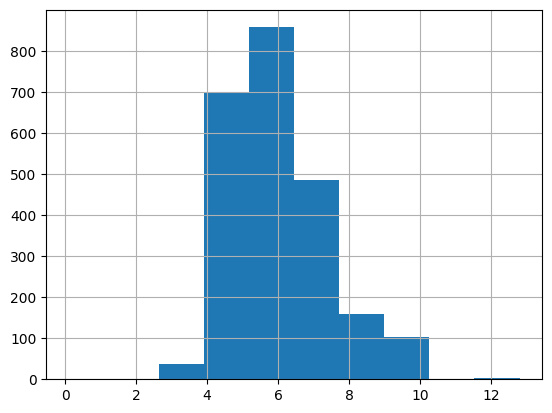

In [397]:
# make a historgram of the mean ABV of all beers
df['ABV'].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [398]:
# get the nuumber of beers which have an NaN in the 'ABV' column
nan_count_age = df['ABV'].isna().sum()

# rrint the result
print(f'Number of beers / rows with NaN in the ABV-column: {nan_count_age}')

Number of beers / rows with NaN in the ABV-column: 68


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [399]:
# count all values in the 'location' column and get the top 10 most frequent locations
location_counts = df['Location'].value_counts().head(10)
# show it!
location_counts.head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [400]:
# filter the Location-column for "Brooklyn"
df_brooklyn = df[df['Location'] == 'Brooklyn, NY']['Beer'].unique()
df_brooklyn

array(['4Beans', 'Jammer', 'Abigale', 'Nomader Weiss', 'Rad',
       'Molotov Lite', 'Bengali', 'Sensi Harvest', 'Hi-Res',
       'KelSo Nut Brown Lager', 'Global Warmer', 'Autumnation (2013)',
       'KelSo India Pale Ale', 'The Crisp', 'Sweet Action',
       'Righteous Ale', 'Bengali Tiger', 'KelSo Pilsner',
       'Hipster Ale (Two Roads Brewing)', 'Bikini Beer',
       'East India Pale Ale', '3Beans', 'Brownstone',
       'Brooklyn Summer Ale', 'Hipster Ale (Westbrook Brewing)', 'Apollo',
       'Harbinger', 'Resin', 'Diesel', 'Autumnation (2011-12) (2011)',
       'The Crisp (2011)', 'Sweet Action (2011)', 'Righteous Ale (2011)',
       'Bengali Tiger (2011)', 'Brooklyn Summer Ale (2011)',
       'Brooklyn Lager (16 oz.)', 'Brooklyn Lager (12 oz.)'], dtype=object)

## What brewery in Brooklyn puts out the most different cans of beer?

In [401]:
# check out the dataframe just to be sure!
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_new
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50,4.5
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26,4.9
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19,4.8
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38,6.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25,6.0


In [402]:
# be wise, recycle code! 
# So I took this from further up:
df_brooklyn = df[df['Location'] == 'Brooklyn, NY'].copy()
unique_counts_brooklyn = df_brooklyn.groupby(['Brewery'])['Beer'].nunique().nlargest(10)
print(unique_counts_brooklyn)

# Sixpoint Craftt Ales puts out the most different cans of beer!

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        5
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Beer, dtype: int64


## What are the five most common styles of beer produced by Sixpoint?

In [403]:
# filter out all the beers by Sixpoint and create a new dataframe
df_sixpoint = df[df['Brewery'] == 'Sixpoint Craft Ales']

# Count the occurrences of each beer style for Sixpoint and get the top 5
top_styles_sixpoint = df_sixpoint['Style'].value_counts(ascending=False).head(5)

# Print the top 5 most common styles
print("The five most common styles of beer produced by Sixpoint are:")
print(top_styles_sixpoint)

The five most common styles of beer produced by Sixpoint are:
Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [404]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_new
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50,4.5
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26,4.9
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19,4.8
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38,6.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25,6.0


In [405]:
# create a new column with just the state abbreviation first!
df['breweries_ny'] = df['Location'].str.contains(", NY")

# now, filter out all breweries in New York state
df_ny_state = df[df['breweries_ny'] == True]

# now list all the unique breweries in this new dataset:
all_breweries_in_ny_state = df_ny_state['Brewery'].unique()

print(all_breweries_in_ny_state)

['Sixpoint Craft Ales' 'Evil Twin Brewing' 'Chatham Brewing'
 'Newburgh Brewing Company' 'Southampton Publick House'
 'Montauk Brewing Company' 'Matt Brewing Company' 'The Bronx Brewery'
 'KelSo Beer Company' 'Brooklyn Brewery' 'The Manhattan Brewing Company'
 'Blue Point Brewing Company' 'Bomb Beer Company' 'Dundee Brewing Company'
 'Upstate Brewing Company' 'Butternuts Beer and Ale']


### Now *count* all of the breweries in New York state

In [406]:
# count all the unique values 
count_all_breweries_nyc = df_ny_state['Brewery'].count()

print(f'There are {count_all_breweries_nyc} breweries in the State of New York.')

There are 74 breweries in the State of New York.


# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [407]:
# display all of the IPAs
df['IPA'] = df['Style'].str.contains("IPA")

# create a new dataframe of all the IPAs
df_ipas = df[df['IPA'] == True]

# get the list of unique IPAs
df_ipas['Style'].unique()

array(['American IPA', 'American Double / Imperial IPA',
       'English India Pale Ale (IPA)', 'Belgian IPA',
       'American White IPA'], dtype=object)

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [408]:
# check if the "IBU" column contains any nans 
contains_nans = df['IBUs'].isna().any()

# Print the result
print(f"Does the 'IBUs' column contain NaNs? {contains_nans}")

Does the 'IBUs' column contain NaNs? True


In [409]:
# since it does contain nans, let's remove them!

# drop all NaNs in the IBUs column
df_cleaned = df.dropna(subset=['IBUs'])

# get the averga
#average_ibu = df_cleaned['IBUs'].mean() # oh, I run into a problem!

# it looks like your column contains a mix of numeric values and strings!

In [410]:
# so I convertt the column to a numeric type, setting errors='coerce' to handle non-numeric values
df_cleaned['IBUs'] = pd.to_numeric(df_cleaned['IBUs'], errors='coerce').copy()

/var/folders/zm/k_hrqbjn6455gkt3jkczx5l80000gn/T/ipykernel_15555/4034270966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['IBUs'] = pd.to_numeric(df_cleaned['IBUs'], errors='coerce').copy()


In [411]:
# now calculate the average
average_ibus = df_cleaned['IBUs'].mean()

print(f'The average IBUs is{average_ibus}.')

The average IBUs is42.71316725978647.


### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [412]:
# oh ok, didn't read this part right here...
# well, I found another way anyway!

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

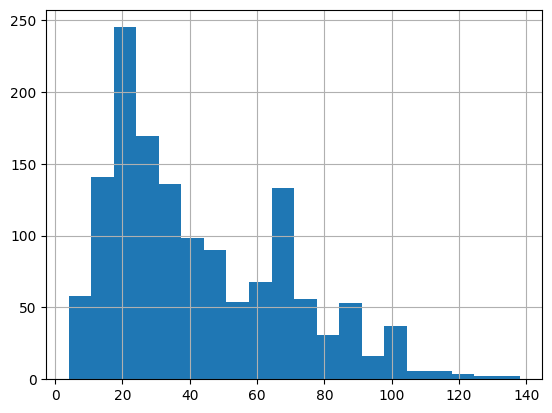

In [413]:
# make a histogram with 20 bins
df_cleaned['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [414]:
# calculate the 75th percentile of the IBUs column
percentile_75 = df_cleaned['IBUs'].quantile(0.75)

# filter the DataFrame to include only beers with IBUs greater than the 75th percentile
df_high_ibus = df_cleaned[df_cleaned['IBUs'] > percentile_75]

# list the beers with their IBUs
result = df_high_ibus[['Beer']]

# print the result
#print("Beers over the 75th percentile in IBUs:")
print(result)

                         Beer
6              Citra Ass Down
7              London Balling
14                Rico Sauvin
17               Pile of Face
21                 Excess IPL
...                       ...
2408    Brew Free! or Die IPA
2410  Ten Fidy Imperial Stout
2412       GUBNA Imperial IPA
2414        Gordon Ale (2009)
2415          Dale's Pale Ale

[346 rows x 1 columns]


## List all of the beers with IBUs below the 25th percentile

In [415]:
# Calculate the 75th percentile of the IBUs column
percentile_25 = df_cleaned['IBUs'].quantile(0.25)

# filter the DataFrame to include only beers with IBUs greater than the 75th percentile
df_low_ibus = df_cleaned[df_cleaned['IBUs'] < percentile_25]

# list the beers with their IBUs
result2 = df_low_ibus[['Beer']]

# print the result
#print("Beers over the 75th percentile in IBUs:")
print(result2)

                               Beer
2                        Wall's End
12                         Sho'nuff
13                      Bloody Show
18                   The Brown Note
19                      House Lager
...                             ...
2372               Bombshell Blonde
2385            Bikini Blonde Lager
2396               Royal Weisse Ale
2404                           Hell
2409  Hell or High Watermelon Wheat

[338 rows x 1 columns]


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<Axes: xlabel='Style'>

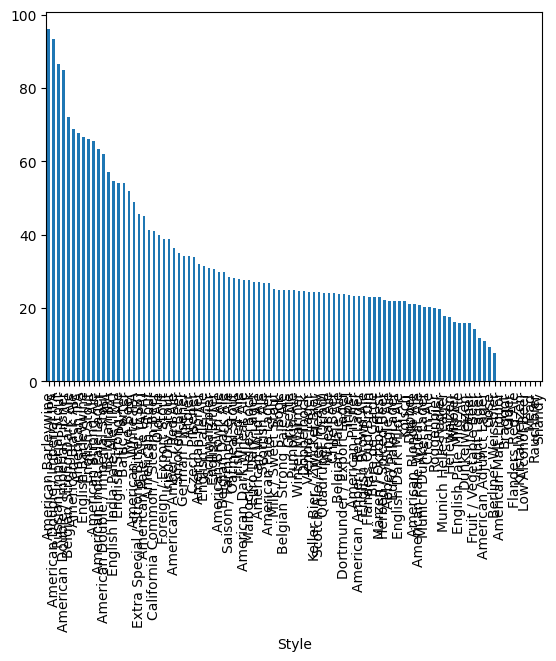

In [416]:
# use the groupby method to first find the type / style of beer
median_ibu_each_style = df_cleaned.groupby('Style')['IBUs'].mean()

# sort the IBUs
median_ibu_each_style_ranked = median_ibu_each_style.sort_values(ascending=False)

# graoh it
median_ibu_each_style_ranked.plot(kind='bar')

<Axes: title={'center': 'Median IBU in different Styles of beer'}, ylabel='Frequency'>

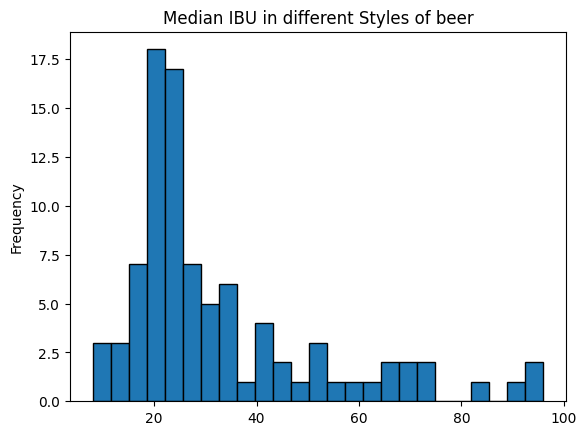

In [421]:
# Alternative way:

# use the groupby method to first find the type / style of beer
df_cleaned.groupby("Style")["IBUs"].median().plot(kind="hist", bins=25, edgecolor='black', title = "Median IBU in different Styles of beer")

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [418]:
## ???

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

The average IBU of the selected wheat beers is: 18.982142857142858


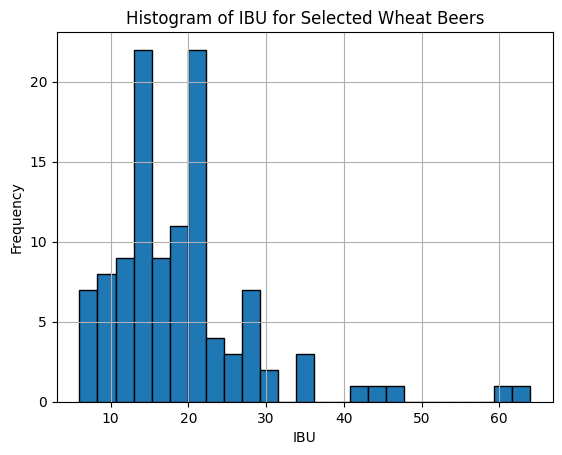

In [420]:
# Filter the DataFrame for the specific styles
wheat_beers = df_cleaned[df_cleaned['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]

# Calculate the average IBU
average_ibu = wheat_beers['IBUs'].mean()

# Print the average IBU
print(f"The average IBU of the selected wheat beers is: {average_ibu}")

# Plot a histogram of the IBU values with 20 to 30 bins
plt.hist(wheat_beers['IBUs'], bins=25, edgecolor='black')
plt.title('Histogram of IBU for Selected Wheat Beers')
plt.xlabel('IBU')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Draw a histogram of the IBUs of those beers

<Axes: title={'center': 'IBUs of different the wheat beers'}, ylabel='Frequency'>

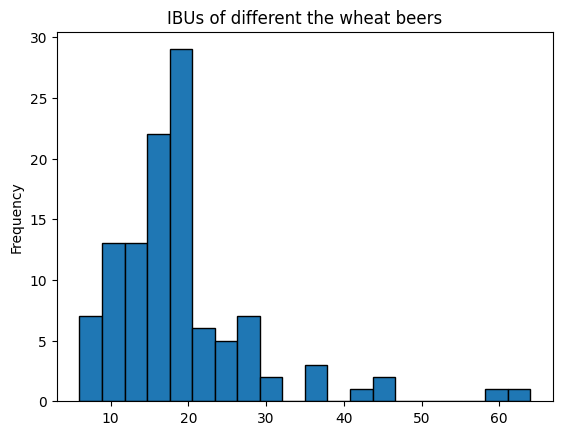

In [432]:
# draw a histogram of the IBUs of those beers

# take the4 existing 'wheat_beers" datafrane as a base
wheat_beers['IBUs'].plot(kind='hist', bins=20, edgecolor="black", title="IBUs of different the wheat beers")

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [434]:
# display all of the IPAs and make a new dataframe
df_ipas = df[df['Style'].str.contains("IPA", na=False)]

In [439]:
df_ipas.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_new,breweries_ny,IPA
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50,4.5,False,True
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68,8.0,False,True
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68,7.6,False,True
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65,6.0,False,True
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100,8.0,False,True


In [444]:
# get the average of any style with "IPA" in it

# Convert 'IBU' column to numeric, coercing errors to NaN
df_ipas['IBUs'] = pd.to_numeric(df_ipas['IBUs'], errors='coerce')

# Group by 'Style' and calculate the median of 'IBU'
df_ipas_mean = df_ipas.groupby('Style')['IBUs'].mean()

/var/folders/zm/k_hrqbjn6455gkt3jkczx5l80000gn/T/ipykernel_15555/3608398837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipas['IBUs'] = pd.to_numeric(df_ipas['IBUs'], errors='coerce')


<Axes: title={'center': 'The average IBU of any IPA style'}, ylabel='Frequency'>

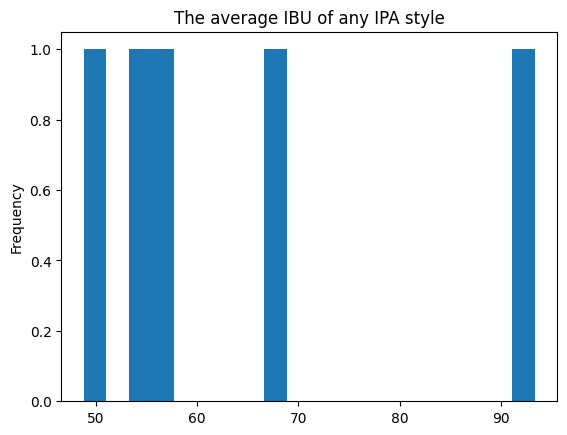

In [449]:
# draw a histogram
df_ipas_mean.plot(kind='hist', bins=20, title="The average IBU of any IPA style")

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!